# **Decision Tree**

A Decision Tree is a versatile supervised machine learning algorithm that uses a tree-like model of decisions and their possible consequences for both classification and regression tasks.

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

# 1. Data Preparation:

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Python excelr/heart.csv.xls')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 2. Exploratory Data Analysis (EDA):

In [2]:
df.head() #gives first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()
#it provides quick, essential information about the DataFrame's structure, memory usage, and column properties.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()
# it gives a descriptive statistical summary of the DataFrame's columns.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()
#for missing values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


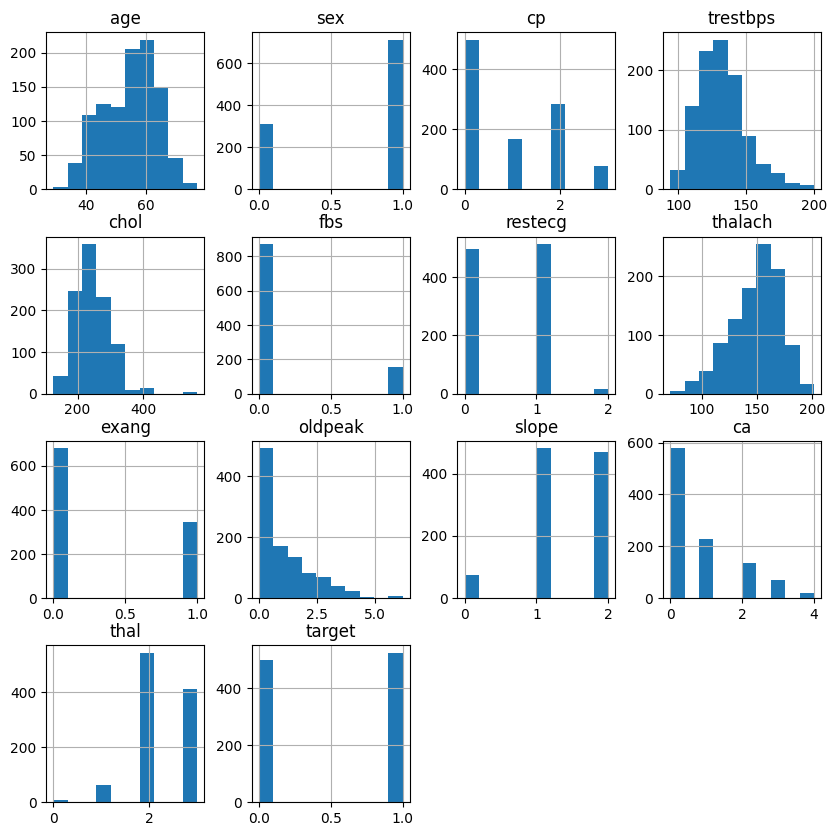

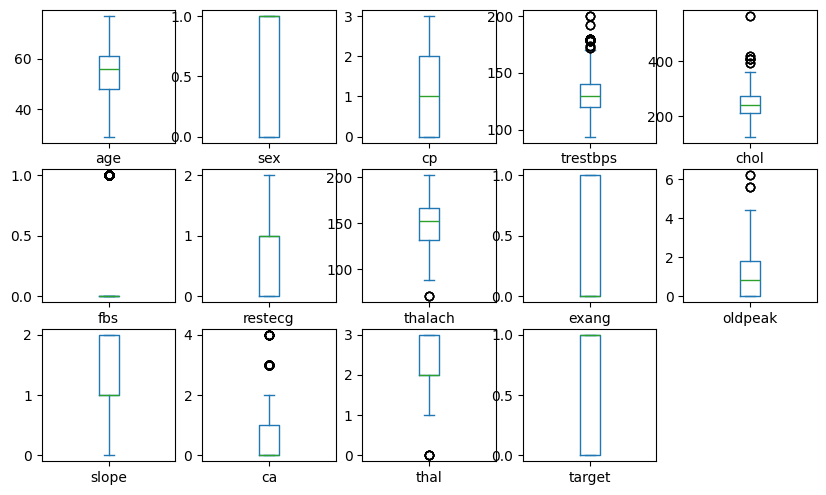

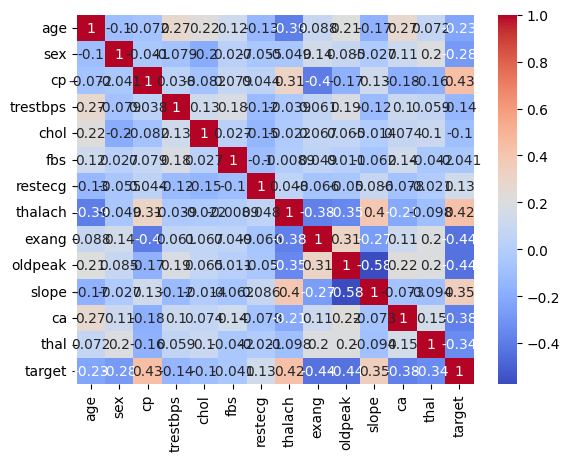

In [7]:
#Visualize the distribution of features, including histograms, box plots, and correlation matrices.
import seaborn as sns
import matplotlib.pyplot as plt

#histogram
df.hist(figsize=(10, 10))
plt.show()

#boxplot
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(10,10))
plt.show()

#correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# 3. Feature Engineering:

In [8]:
import warnings
warnings.filterwarnings('ignore')
df.median()
# Fill missing values
df.fillna(df.median(), inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 4. Decision Tree Classification:

In [12]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
le = LabelEncoder()
# List of categorical columns to encode
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop(['target', 'target'], axis=1)
y = df['target']
X = df.drop('target', axis=1)
y = df['target']
X
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#TRAIN THE DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier
# Create and train the model
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# 6. Model Evaluation and Analysis:

Accuracy: 0.9853658536585366


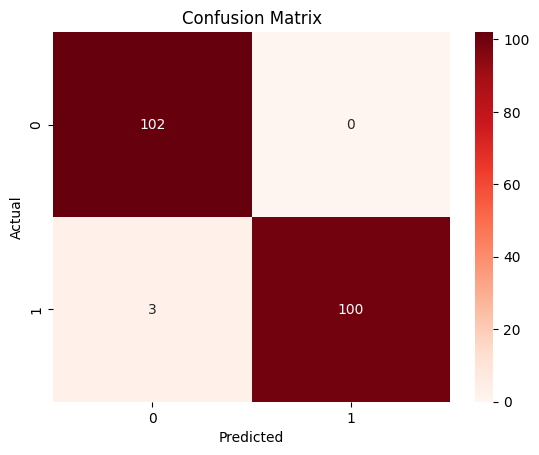

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# classification Report
print(classification_report(y_test, y_pred))

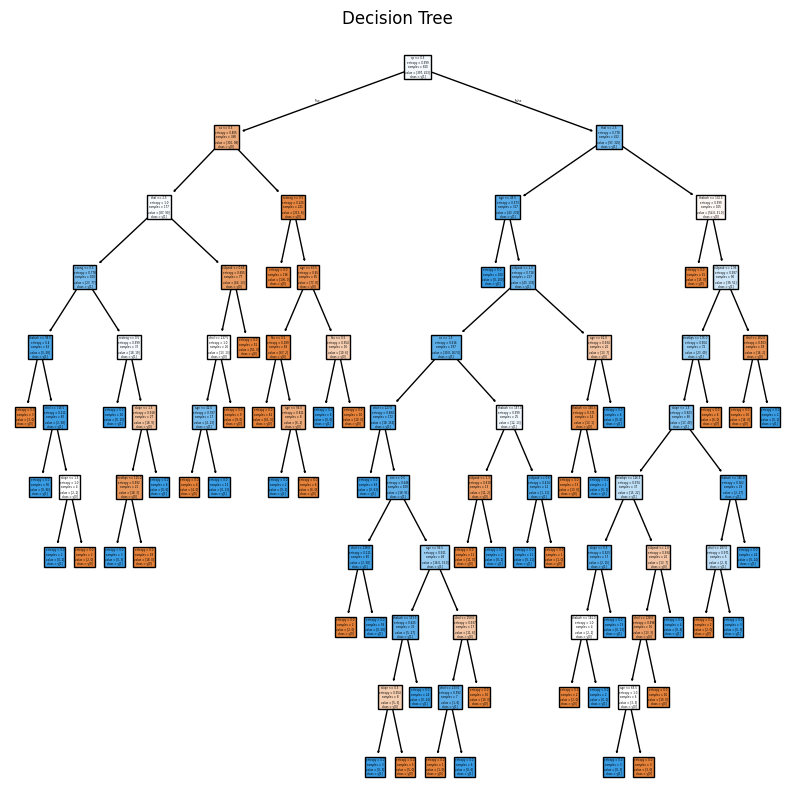

In [15]:
#decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree")
plt.show()

# Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


Decision tree hyperparameters are settings we choose before training the model to control its complexity, which ultimately manages the balance between underfitting and overfitting. For instance, max_depth directly limits how many levels the tree can grow. Keeping this value low is a primary defense against overfitting because it forces the model to generalize instead of memorizing specific noisy data points. Similarly, the criterion defines the math used to find the best possible split at each node; the most common choices are 'gini' (Gini Impurity) and 'entropy' (Information Gain). Finally, parameters like min_samples_leaf and min_samples_split act as constraints. If you increase the value of min_samples_leaf, the tree is forced to end a branch with a larger group of samples, preventing it from creating tiny, unreliable leaf nodes and resulting in a smoother, more generalized model.

---


2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding is the simplest way to convert categories into numbers by assigning a unique integer to each one (e.g., 'Small' = 1, 'Medium' = 2). This is ideal only for ordinal data where the categories have a natural, meaningful order (like shirt sizes). However, if you use it on nominal data (data without order, like colors), you introduce an unintended numerical hierarchy,the model might incorrectly assume that '3' is somehow superior to '1'.\
One-Hot Encoding (OHE) avoids this bias entirely by creating a new binary column for every unique category. For any given data point, only one of these new columns will be marked 1, while the rest are 0. OHE is the standard approach for nominal categorical data because it treats every category as an independent feature. This prevents the machine learning algorithm from incorrectly inferring any magnitude or ranking based on the assigned numerical values.